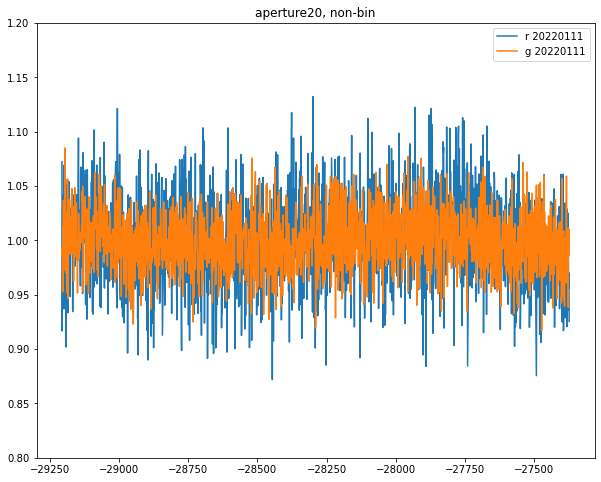

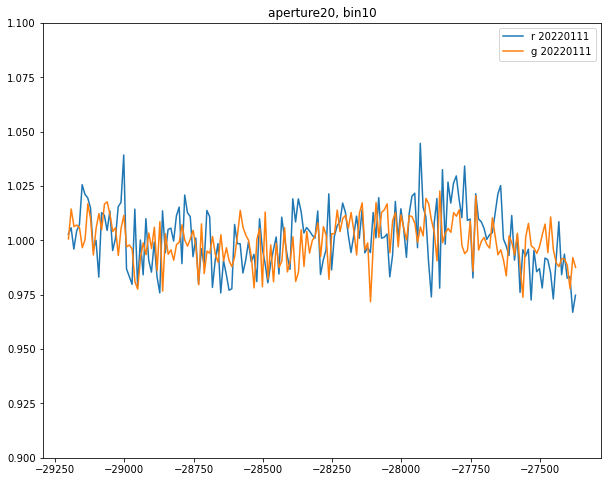

In [33]:
import numpy as np
import os
from preseimei import movie_lc_ana
import matplotlib.pyplot as plt
time_offset = 5148650000

dir_lc ="/alps/south/reduced/lcs/"
target = "WD_triccs28"
dir_lc_target = dir_lc + target
r_ap = 20
bin_t = 10


obs_dates = ["20220111", "20220112", "20220113", "20220114"]
for obs_date in obs_dates:
    try:

        data_g= np.load(os.path.join(dir_lc_target, "g_band_%s_lc%s.npz" % (obs_date, r_ap)))
        data_r = np.load(os.path.join(dir_lc_target, "r_band_%s_lc%s.npz" % (obs_date, r_ap)))

        lc_g = [data_g["time"] - time_offset, data_g["flux"]]
        lc_r = [data_r["time"] - time_offset, data_r["flux"]]
        lc_g_bin = movie_lc_ana.make_bin_lc(data_g["time"] - time_offset, data_g["flux"], bin_t)
        lc_r_bin = movie_lc_ana.make_bin_lc(data_r["time"] - time_offset, data_r["flux"], bin_t)

        plt.figure(figsize = (10,8))
        plt.plot(lc_r[0], lc_r[1], label="r %s" % obs_date)
        plt.plot(lc_g[0], lc_g[1], label="g %s" % obs_date)
        plt.legend()
        plt.ylim(0.8,1.2)
        plt.title("aperture%s, non-bin" % r_ap )

        plt.show()
        plt.figure(figsize = (10,8))

        plt.plot(lc_r_bin.time.value, lc_r_bin.flux.value, label="r %s" % obs_date )
        plt.plot(lc_g_bin.time.value, lc_g_bin.flux.value, label="g %s" % obs_date)
        plt.legend()
        plt.ylim(0.9,1.1)
        plt.title("aperture%s, bin%d" % (r_ap ,bin_t))

        plt.show()
    except:
        continue


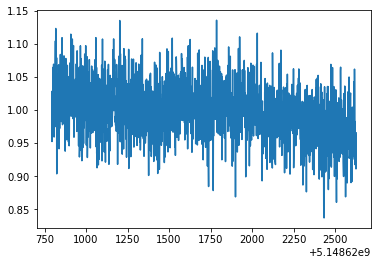

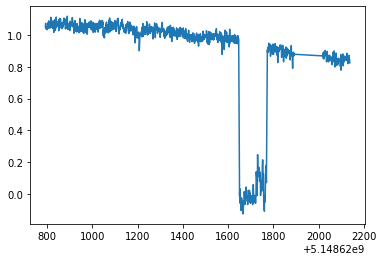

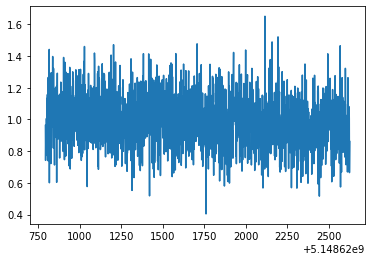

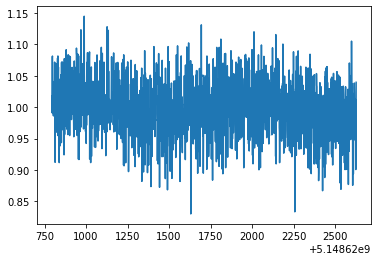

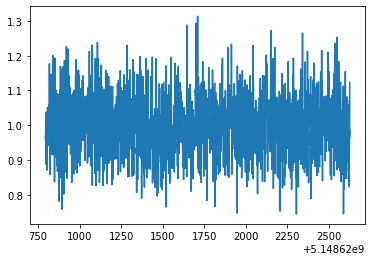

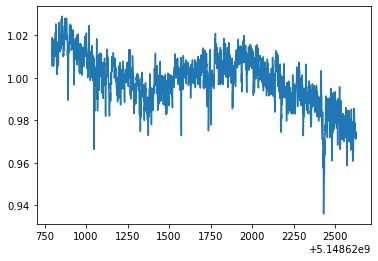

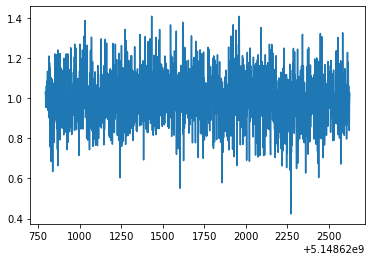

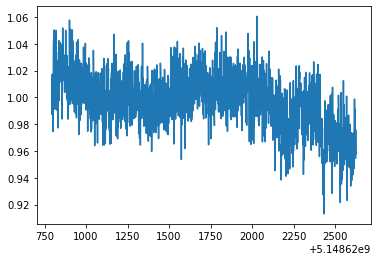

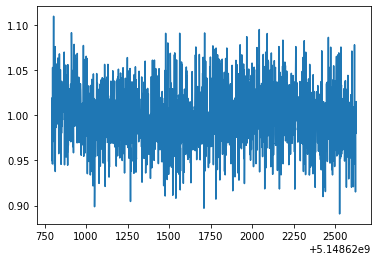

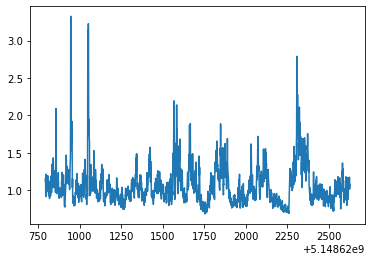

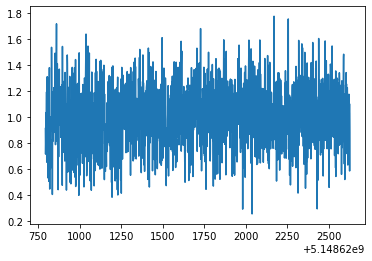

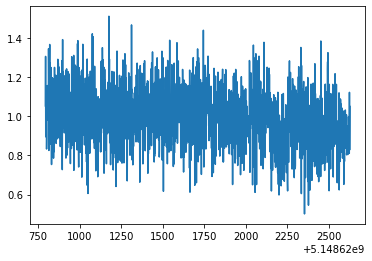

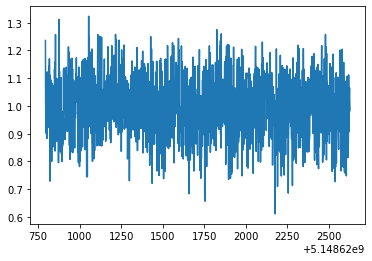

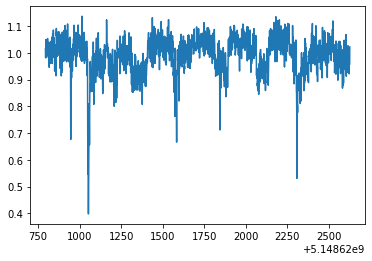

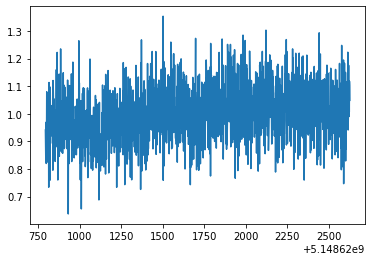

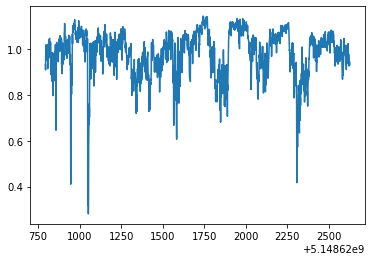

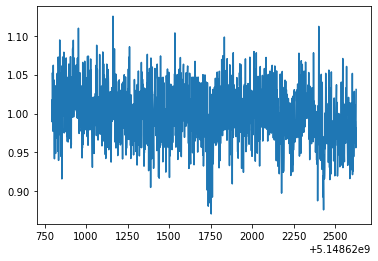

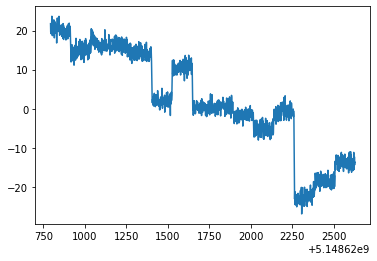

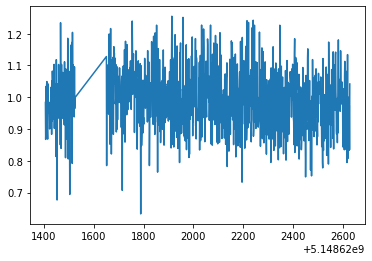

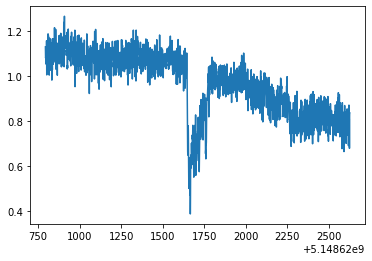

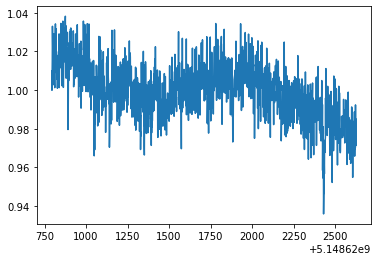

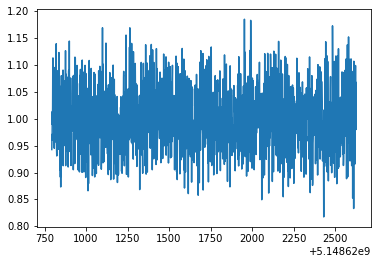

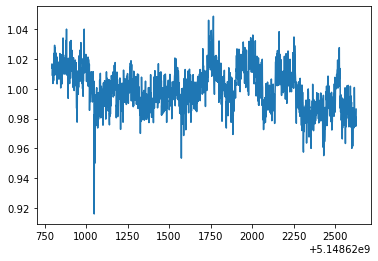

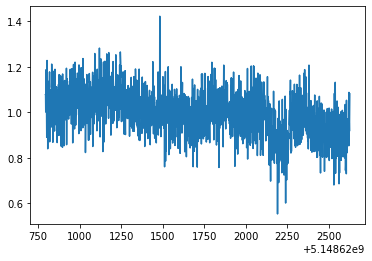

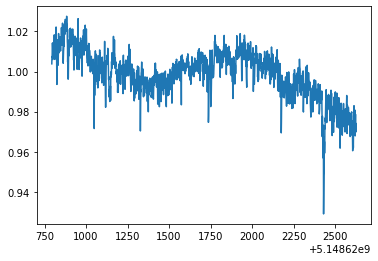

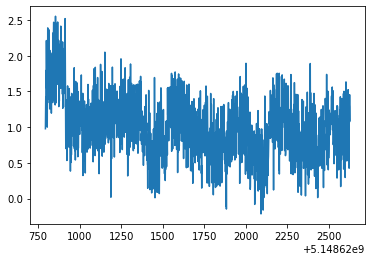

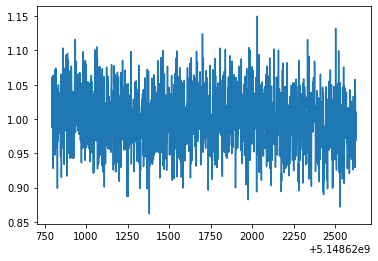

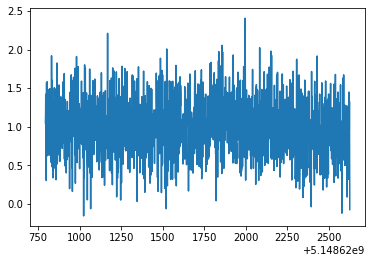

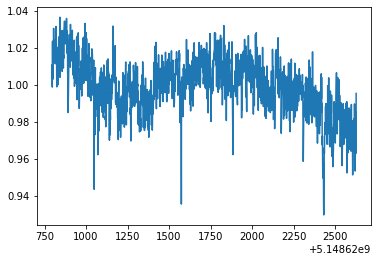

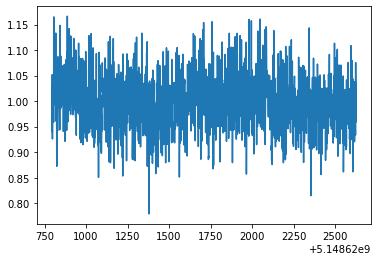

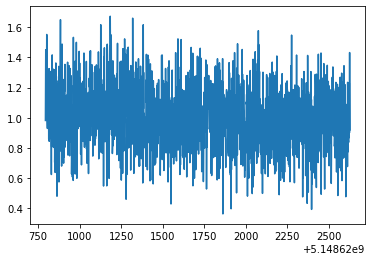

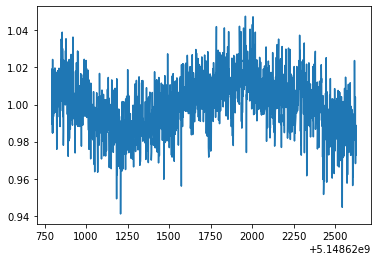

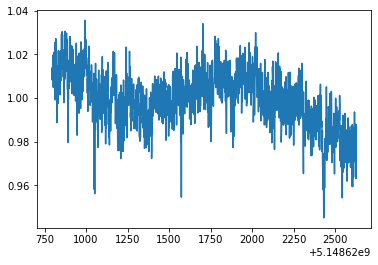

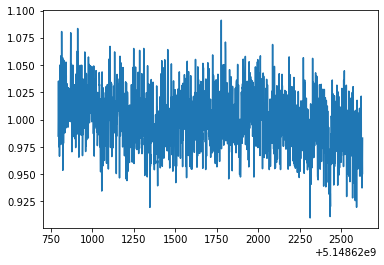

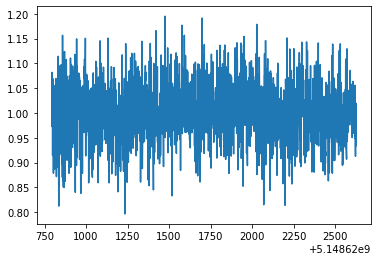

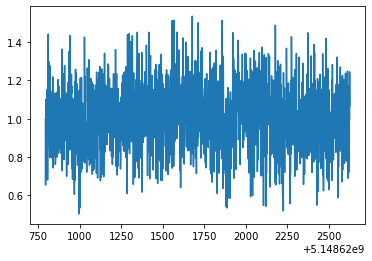

In [32]:
import numpy as np
import os
from preseimei import movie_lc_ana
import matplotlib.pyplot as plt
time_offset = 5148650000

obs_date = "20220111"
target = "WD_triccs28"
dir_lc ="/alps/south/reduced/%s_analyzed/movies/%s/g_band" % (obs_date, target)
r_ap = 20
bin_t = 10

lc_all = np.load(os.path.join(dir_lc, "all_lcs%d.npz" % (r_ap)), allow_pickle=True)
time = lc_all["time"]
flux = lc_all["flux"]
for i in range(len(time)):
    plt.plot(time[i], flux[i]/np.median(flux[i]))
    plt.show()


In [28]:
lc_all.files

['time', 'flux', 'i_target', 'gaia_ids']

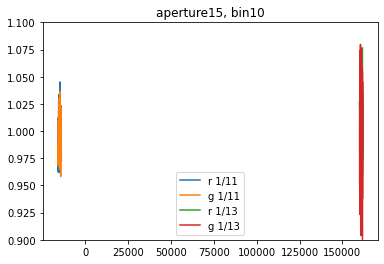

In [99]:

plt.plot(lc_r_bin.time.value, lc_r_bin.flux.value, label="r 1/11")

plt.plot(lc_g_bin.time.value, lc_g_bin.flux.value, label="g 1/11")
plt.plot(lc_r_bin_13.time.value, lc_r_bin_13.flux.value, label="r 1/13")
plt.plot(lc_g_bin_13.time.value, lc_g_bin_13.flux.value, label="g 1/13")
plt.legend()

plt.ylim(0.9,1.1)
plt.title("aperture%s, bin%d" % (r_ap ,bin_t))
plt.show()

In [103]:

from scipy import optimize
def get_errors(covar):
    return np.sqrt(np.array([covar[0][0], covar[1][1],covar[2][2]]))
    
def fit_sin(x_data, y_data):
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                                   p0=[0.02, 700, 0], sigma=np.ones(len(x_data) ) *0.03)
    errors = get_errors(params_covariance)
    return  params, params_covariance, errors 

def test_func(x, a, b, c ):
    return 1 + a * np.sin(2 * np.pi * (x - c)/b)


params_g_13, params_covariance_g_13, errors_g_13 = fit_sin(lc_g_bin_13.time.value, lc_g_bin_13.flux.value)
params_g, params_covariance_g, errors_g = fit_sin(lc_g_bin.time.value, lc_g_bin.flux.value)
params_r_13, params_covariance_r_13, errors_r_13 = fit_sin(lc_r_bin_13.time.value, lc_r_bin_13.flux.value)
params_r, params_covariance_r, errors_r = fit_sin(lc_r_bin.time.value, lc_r_bin.flux.value)




In [104]:
print(params_g,  errors_g)
print(params_r,   errors_r)
print(params_g_13, errors_g_13)
print(params_r_13,  errors_r_13)
print()

[ 1.54968121e-02  6.99854121e+02 -1.28420361e+02] [1.00905423e-03 1.04231017e+01 2.19179399e+02]
[ 1.32519412e-02  6.79370692e+02 -5.45760410e+02] [1.41756208e-03 1.61268913e+01 3.39686140e+02]
[2.42119347e-02 6.91353248e+02 2.02459965e+03] [3.20723425e-03 2.03084961e+01 4.66796622e+03]
[8.94321040e-03 5.94515227e+02 2.43062828e+04] [2.73978904e-03 3.26975296e+01 7.51233964e+03]



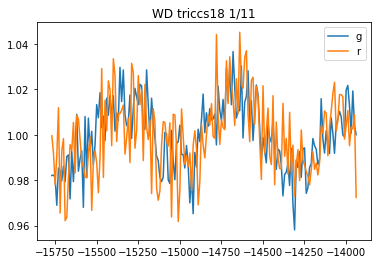

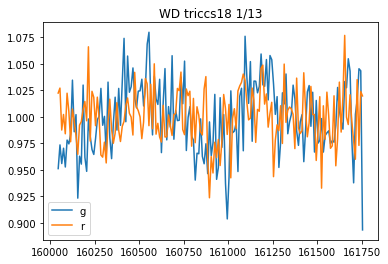

In [128]:
def model_cal(x_data, params):
    model = test_func(x_data, params[0], params[1], params[2])
    return model

model_g = model_cal(lc_g_bin.time.value, params_g)
plt.plot(lc_g_bin.time.value, lc_g_bin.flux.value, label="g")
#plt.plot(lc_g_bin.time.value, model_g)

model_r = model_cal(lc_r_bin.time.value, params_r,)
plt.plot(lc_r_bin.time.value, lc_r_bin.flux.value, label="r")
#plt.plot(lc_r_bin.time.value, model_r)
plt.legend()
plt.title("WD triccs18 1/11")
plt.show()
model_g_13_pred = model_cal(lc_g_bin_13.time.value, params_g)
plt.show()


model_g_13 = model_cal(lc_g_bin_13.time.value, params_g_13)
plt.plot(lc_g_bin_13.time.value, lc_g_bin_13.flux.value, label="g")
#plt.plot(lc_g_bin_13.time.value, model_g_13)

model_r_13 = model_cal(lc_r_bin_13.time.value, params_r_13)
plt.plot(lc_r_bin_13.time.value, lc_r_bin_13.flux.value, label="r")
#plt.plot(lc_r_bin_13.time.value, model_r_13)
plt.title("WD triccs18 1/13")
plt.legend()
plt.show()



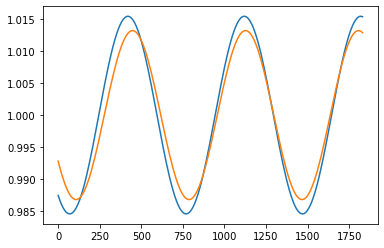

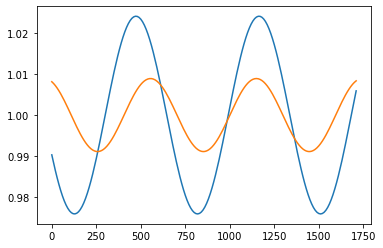

In [119]:
plt.plot(lc_g_bin.time.value -np.min(lc_g_bin.time.value), model_g)
plt.plot(lc_r_bin.time.value -np.min(lc_r_bin.time.value), model_r)
plt.show()
plt.plot(lc_g_bin_13.time.value- np.min(lc_g_bin_13.time.value), model_g_13)
plt.plot(lc_r_bin_13.time.value- np.min(lc_r_bin_13.time.value), model_r_13)
plt.show()


In [ ]:
data_g_13["time"] 